In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
# Install a Korean font
!apt-get update -qq > /dev/null
!apt-get install fonts-nanum -qq > /dev/null

# Find the font path for NanumGothic
font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
for fpath in font_files:
    fm.fontManager.addfont(fpath)

# Set the font to NanumGothic
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False) # Allow negative signs to be displayed correctly

print("Korean font installed and configured.")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Korean font installed and configured.


In [ ]:
# 데이터 불러오기
df_7 = pd.read_csv('/content/drive/MyDrive/유통경진대회/A_out_7.csv')
df_1 = pd.read_csv('/content/drive/MyDrive/유통경진대회/A_out_1.csv')

print(df_7.columns, df_1.columns)

/tmp/ipython-input-1908071998.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_7 = pd.read_csv('/content/drive/MyDrive/유통경진대회/A_out_7.csv')


Index(['Unnamed: 0', '판매일', '구분', '매출처코드', '매출처 우편번호', '판매수량', '옵션코드', '규격',
       '입수', '바코드', '상품명', '대분류', '중분류', '소분류', '공급가액', '부가세', 'is_holiday',
       'holiday_name', 'is_long_holiday', 'days_to_holiday',
       'days_from_holiday', 'is_day_before_holiday', 'is_day_after_holiday',
       'is_lunar_new_year', 'is_chuseok', 'is_independence_day',
       'is_childrens_day', 'is_memorial_day', 'is_national_foundation_day',
       'is_summer_vacation', 'is_year_end_season', '7_outlier', '요일',
       '평균기온(℃)', '최저기온(℃)', '최고기온(℃)', '국제유가', '소비자물가지수', '소비자심리지수'],
      dtype='object') Index(['Unnamed: 0', '판매일', '구분', '매출처코드', '매출처 우편번호', '판매수량', '옵션코드', '규격',
       '입수', '바코드', '상품명', '대분류', '중분류', '소분류', '공급가액', '부가세', 'is_holiday',
       'holiday_name', 'is_long_holiday', 'days_to_holiday',
       'days_from_holiday', 'is_day_before_holiday', 'is_day_after_holiday',
       'is_lunar_new_year', 'is_chuseok', 'is_independence_day',
       'is_childrens_day', 'is_memorial_day', '

## 7

In [ ]:
# '판매일' 컬럼을 datetime 형식으로 변환
df_7['판매일'] = pd.to_datetime(df_7['판매일'])

# '판매일' 컬럼에서 월 추출하여 '월' 컬럼 생성
df_7['월'] = df_7['판매일'].dt.month

# 결과 확인 (처음 5개 행)
print(df_7[['판매일', '월']].head())

         판매일  월
0 2021-01-04  1
1 2021-01-04  1
2 2021-01-04  1
3 2021-01-04  1
4 2021-01-04  1


In [ ]:
# 연간 주기성
df_7['month_sin'] = np.sin(2 * np.pi * df_7['월'] / 12)
df_7['month_cos'] = np.cos(2 * np.pi * df_7['월'] / 12)

# 주간 주기성
df_7['dayofweek_sin'] = np.sin(2 * np.pi * df_7['요일'] / 7)
df_7['dayofweek_cos'] = np.cos(2 * np.pi * df_7['요일'] / 7)

df_7.head()

,Unnamed: 0,판매일,구분,매출처코드,매출처 우편번호,판매수량,옵션코드,규격,입수,바코드,...,최저기온(℃),최고기온(℃),국제유가,소비자물가지수,소비자심리지수,월,month_sin,month_cos,dayofweek_sin,dayofweek_cos
0,102,2021-01-04,매출,159,37581,12,EA,12입,1,8.801094e+12,...,-8.1,3.9,54.65,0.9,95.2,1,0.5,0.866025,0.0,1.0
1,103,2021-01-04,매출,159,37581,24,EA,24입,1,8.801094e+12,...,-8.1,3.9,54.65,0.9,95.2,1,0.5,0.866025,0.0,1.0
2,152,2021-01-04,매출,171,37611,1,BX,30입,30,1.701006e+12,...,-8.1,3.9,54.65,0.9,95.2,1,0.5,0.866025,0.0,1.0
3,159,2021-01-04,매출,171,37611,5,BX,6입,6,8.801043e+12,...,-8.1,3.9,54.65,0.9,95.2,1,0.5,0.866025,0.0,1.0
4,178,2021-01-04,매출,171,37611,10,CS,6입,6,8.809274e+12,...,-8.1,3.9,54.65,0.9,95.2,1,0.5,0.866025,0.0,1.0


나중에 삭제가 좋을 듯, 새로 만든 거랑 비교해보고 지우자

In [ ]:
df_7.columns

Index(['Unnamed: 0', '판매일', '구분', '매출처코드', '매출처 우편번호', '판매수량', '옵션코드', '규격',
       '입수', '바코드', '상품명', '대분류', '중분류', '소분류', '공급가액', '부가세', 'is_holiday',
       'holiday_name', 'is_long_holiday', 'days_to_holiday',
       'days_from_holiday', 'is_day_before_holiday', 'is_day_after_holiday',
       'is_lunar_new_year', 'is_chuseok', 'is_independence_day',
       'is_childrens_day', 'is_memorial_day', 'is_national_foundation_day',
       'is_summer_vacation', 'is_year_end_season', '7_outlier', '요일',
       '평균기온(℃)', '최저기온(℃)', '최고기온(℃)', '국제유가', '소비자물가지수', '소비자심리지수', '월',
       'month_sin', 'month_cos', 'dayofweek_sin', 'dayofweek_cos'],
      dtype='object')

In [ ]:
# 쓸 수 없는 칼럼 drop
df = df_7.copy()
df.drop(columns=['Unnamed: 0', '구분','매출처코드', '매출처 우편번호', '옵션코드', '규격', '입수', '바코드','상품명', '대분류', '중분류', '소분류','공급가액','부가세'], inplace=True)
df.columns

Index(['판매일', '판매수량', 'is_holiday', 'holiday_name', 'is_long_holiday',
       'days_to_holiday', 'days_from_holiday', 'is_day_before_holiday',
       'is_day_after_holiday', 'is_lunar_new_year', 'is_chuseok',
       'is_independence_day', 'is_childrens_day', 'is_memorial_day',
       'is_national_foundation_day', 'is_summer_vacation',
       'is_year_end_season', '7_outlier', '요일', '평균기온(℃)', '최저기온(℃)',
       '최고기온(℃)', '국제유가', '소비자물가지수', '소비자심리지수', '월', 'month_sin', 'month_cos',
       'dayofweek_sin', 'dayofweek_cos'],
      dtype='object')

In [ ]:
display(
    df['is_childrens_day'].value_counts(),
    df['is_independence_day'].value_counts(),
    df['is_memorial_day'].value_counts(),
    df['is_national_foundation_day'].value_counts()
)

,count
is_childrens_day,
0,221549
1,152


,count
is_independence_day,
0,221701


,count
is_memorial_day,
0,221502
1,199


,count
is_national_foundation_day,
0,221701


In [ ]:
# 아예 없는 것도 삭제
df.drop(columns=['is_independence_day', 'is_national_foundation_day'], inplace=True)

기본시간

In [ ]:
# 중분류별로 날짜순 정렬 (중요!)
df = df.sort_values('판매일').reset_index(drop=True)
df.head(-5)

,판매일,판매수량,is_holiday,holiday_name,is_long_holiday,days_to_holiday,days_from_holiday,is_day_before_holiday,is_day_after_holiday,is_lunar_new_year,...,최저기온(℃),최고기온(℃),국제유가,소비자물가지수,소비자심리지수,월,month_sin,month_cos,dayofweek_sin,dayofweek_cos
0,2021-01-04,12,0,NaN,0,0,3,0,0,0,...,-8.1,3.9,54.65,0.9,95.2,1,5.000000e-01,0.866025,0.000000,1.000000
1,2021-01-04,1,0,NaN,0,0,3,0,0,0,...,-8.1,3.9,54.65,0.9,95.2,1,5.000000e-01,0.866025,0.000000,1.000000
2,2021-01-04,1,0,NaN,0,0,3,0,0,0,...,-8.1,3.9,54.65,0.9,95.2,1,5.000000e-01,0.866025,0.000000,1.000000
3,2021-01-04,1,0,NaN,0,0,3,0,0,0,...,-8.1,3.9,54.65,0.9,95.2,1,5.000000e-01,0.866025,0.000000,1.000000
4,2021-01-04,2,0,NaN,0,0,3,0,0,0,...,-8.1,3.9,54.65,0.9,95.2,1,5.000000e-01,0.866025,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221691,2024-06-27,1,0,NaN,0,0,0,0,0,0,...,17.3,26.5,84.11,2.4,100.9,6,1.224647e-16,-1.000000,0.433884,-0.900969
221692,2024-06-27,1,0,NaN,0,0,0,0,0,0,...,17.3,26.5,84.11,2.4,100.9,6,1.224647e-16,-1.000000,0.433884,-0.900969
221693,2024-06-27,1,0,NaN,0,0,0,0,0,0,...,17.3,26.5,84.11,2.4,100.9,6,1.224647e-16,-1.000000,0.433884,-0.900969
221694,2024-06-27,1,0,NaN,0,0,0,0,0,0,...,17.3,26.5,84.11,2.4,100.9,6,1.224647e-16,-1.000000,0.433884,-0.900969


In [ ]:
# ============================================
# 2. 기본 시간 Features
# ============================================
df['day_of_week'] = df['판매일'].dt.dayofweek  # 0=월, 6=일
df['day_of_year'] = df['판매일'].dt.dayofyear
df['week_of_year'] = df['판매일'].dt.isocalendar().week
df['day_of_month'] = df['판매일'].dt.day
df['quarter'] = df['판매일'].dt.quarter

In [ ]:
df['년도'] = df['판매일'].dt.year
df['년도']

,년도
0,2021
1,2021
2,2021
3,2021
4,2021
...,...
221696,2024
221697,2024
221698,2024
221699,2024


In [ ]:
# ============================================
# 3. 달력 Features
# ============================================
# 주말 여부
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)

# 월초/월말
df['is_month_start'] = (df['day_of_month'] <= 3).astype(int)
df['is_month_end'] = (df['day_of_month'] >= 28).astype(int)

# 해당 월의 주말 개수 (미리 계산)
weekend_count = df.groupby(['년도', '월', 'is_weekend']).size().unstack(fill_value=0)
if 1 in weekend_count.columns:
    weekend_count = weekend_count[1].reset_index()
    weekend_count.columns = ['년도', '월', 'weekend_count_in_month']
    df = df.merge(weekend_count, on=['년도', '월'], how='left')
else:
    df['weekend_count_in_month'] = 0

In [ ]:
# ============================================
# 4. 계절성 Features (Cyclical Encoding)
# ============================================
# 연간 주기 (1~365)
df['day_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365.25)
df['day_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365.25)

# 월간 주기 (1~12)
df['month_sin'] = np.sin(2 * np.pi * df['월'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['월'] / 12)

# 주간 주기 (0~6)
df['dow_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['dow_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

In [ ]:
# ============================================
# 5. Lag Features
# ============================================
lag_days = [1, 7, 14, 30, 60, 90, 365]

for lag in lag_days:
    df[f'sales_lag_{lag}d'] = df['판매수량'].shift(lag)

# 전주 동일 요일 (같은 요일끼리)
df['sales_lag_7d_same_dow'] = df.groupby('day_of_week')['판매수량'].shift(1)

# 전년 동월
df['sales_lag_12m'] = df['판매수량'].shift(365)

In [ ]:
# ============================================
# 6. Rolling Features
# ============================================
windows = [7, 14, 30, 60, 90]

for window in windows:
  # 이동 평균
  df[f'sales_rolling_mean_{window}d'] = df['판매수량'].rolling(
      window=window, min_periods=1
  ).mean()

  # 이동 표준편차
  df[f'sales_rolling_std_{window}d'] = df['판매수량'].rolling(
      window=window, min_periods=1
  ).std()

  # 이동 최댓값
  df[f'sales_rolling_max_{window}d'] = df['판매수량'].rolling(
      window=window, min_periods=1
  ).max()

  # 이동 최솟값
  df[f'sales_rolling_min_{window}d'] = df['판매수량'].rolling(
      window=window, min_periods=1
  ).min()

# 지수가중이동평균 (EWM)
for span in [7, 30]:
  df[f'sales_ewm_{span}d'] = df['판매수량'].ewm(
      span=span, min_periods=1
  ).mean()

In [ ]:
# ============================================
# 7. Growth Rate Features
# ============================================
# 전일 대비
df['sales_growth_1d'] = df['판매수량'].pct_change(1)

# 전주 대비 (WoW)
df['sales_growth_wow'] = df['판매수량'].pct_change(7)

# 전월 대비 (MoM)
df['sales_growth_mom'] = df['판매수량'].pct_change(30)

# 전년 대비 (YoY)
df['sales_growth_yoy'] = df['판매수량'].pct_change(365)

In [ ]:
# ============================================
# 8. 요일/월별 통계
# ============================================
# 해당 요일의 평균 판매량
df['dow_mean'] = df.groupby('day_of_week')['판매수량'].transform('mean')

# 해당 월의 평균 판매량
df['month_mean'] = df.groupby('월')['판매수량'].transform('mean')

# 전체 평균 대비 비율
overall_mean = df['판매수량'].mean()
df['sales_vs_overall_mean'] = df['판매수량'] / (overall_mean + 1e-5)

In [ ]:
df.shape

(221701, 82)

요일 원핫인코딩

In [ ]:
# 요일 원핫인코딩 (0=월요일 ~ 6=일요일)
dow_dummies = pd.get_dummies(df['day_of_week'], prefix='dow')
df = pd.concat([df, dow_dummies], axis=1)

In [ ]:
df.shape

(221701, 88)

In [ ]:
# 요일 분포 확인
print(df['day_of_week'].value_counts().sort_index())
# 0(월) ~ 6(일) 중 뭐가 있는지

# 날짜 확인
print(df['요일'].min(), '~', df['요일'].max())
# 2021-2024년 데이터면 일요일이 수백 개는 있어야 정상

# 일요일만 필터링
sundays = df[df['day_of_week'] == 6]
print(f"일요일 데이터: {len(sundays)}개")

day_of_week
0    48063
1    37994
2    35582
3    42337
4    57403
5      322
Name: count, dtype: int64
0 ~ 5
일요일 데이터: 0개


In [ ]:
df.columns

Index(['판매일', '판매수량', 'is_holiday', 'holiday_name', 'is_long_holiday',
       'days_to_holiday', 'days_from_holiday', 'is_day_before_holiday',
       'is_day_after_holiday', 'is_lunar_new_year', 'is_chuseok',
       'is_childrens_day', 'is_memorial_day', 'is_summer_vacation',
       'is_year_end_season', '7_outlier', '요일', '평균기온(℃)', '최저기온(℃)',
       '최고기온(℃)', '국제유가', '소비자물가지수', '소비자심리지수', '월', 'month_sin', 'month_cos',
       'dayofweek_sin', 'dayofweek_cos', 'day_of_week', 'day_of_year',
       'week_of_year', 'day_of_month', 'quarter', 'is_weekend',
       'is_month_start', 'is_month_end', '년도', 'weekend_count_in_month',
       'day_sin', 'day_cos', 'dow_sin', 'dow_cos', 'sales_lag_1d',
       'sales_lag_7d', 'sales_lag_14d', 'sales_lag_30d', 'sales_lag_60d',
       'sales_lag_90d', 'sales_lag_365d', 'sales_lag_7d_same_dow',
       'sales_lag_12m', 'sales_rolling_mean_7d', 'sales_rolling_std_7d',
       'sales_rolling_max_7d', 'sales_rolling_min_7d',
       'sales_rolling_mean_14d

In [ ]:
df.drop(columns=['dayofweek_sin', 'dayofweek_cos'], inplace=True)
df.columns # 최종칼럼

Index(['판매일', '판매수량', 'is_holiday', 'holiday_name', 'is_long_holiday',
       'days_to_holiday', 'days_from_holiday', 'is_day_before_holiday',
       'is_day_after_holiday', 'is_lunar_new_year', 'is_chuseok',
       'is_childrens_day', 'is_memorial_day', 'is_summer_vacation',
       'is_year_end_season', '7_outlier', '요일', '평균기온(℃)', '최저기온(℃)',
       '최고기온(℃)', '국제유가', '소비자물가지수', '소비자심리지수', '월', 'month_sin', 'month_cos',
       'day_of_week', 'day_of_year', 'week_of_year', 'day_of_month', 'quarter',
       'is_weekend', 'is_month_start', 'is_month_end', '년도',
       'weekend_count_in_month', 'day_sin', 'day_cos', 'dow_sin', 'dow_cos',
       'sales_lag_1d', 'sales_lag_7d', 'sales_lag_14d', 'sales_lag_30d',
       'sales_lag_60d', 'sales_lag_90d', 'sales_lag_365d',
       'sales_lag_7d_same_dow', 'sales_lag_12m', 'sales_rolling_mean_7d',
       'sales_rolling_std_7d', 'sales_rolling_max_7d', 'sales_rolling_min_7d',
       'sales_rolling_mean_14d', 'sales_rolling_std_14d',
       'sales

In [ ]:
df.to_csv('/content/drive/MyDrive/유통경진대회/A_out_7_final.csv')

## 1

칼럼 삭제

In [ ]:
df_1.columns

Index(['Unnamed: 0', '판매일', '구분', '매출처코드', '매출처 우편번호', '판매수량', '옵션코드', '규격',
       '입수', '바코드', '상품명', '대분류', '중분류', '소분류', '공급가액', '부가세', 'is_holiday',
       'holiday_name', 'is_long_holiday', 'days_to_holiday',
       'days_from_holiday', 'is_day_before_holiday', 'is_day_after_holiday',
       'is_lunar_new_year', 'is_chuseok', 'is_independence_day',
       'is_childrens_day', 'is_memorial_day', 'is_national_foundation_day',
       'is_summer_vacation', 'is_year_end_season', '1_outlier', '요일',
       '평균기온(℃)', '최저기온(℃)', '최고기온(℃)', '국제유가', '소비자물가지수', '소비자심리지수'],
      dtype='object')

In [ ]:
# 쓸 수 없는 칼럼 drop
df = df_1.copy()
df.drop(columns=['Unnamed: 0', '구분','매출처코드', '매출처 우편번호', '옵션코드', '규격', '입수', '바코드','상품명', '대분류', '중분류', '소분류','공급가액','부가세'], inplace=True)
df.columns

Index(['판매일', '판매수량', 'is_holiday', 'holiday_name', 'is_long_holiday',
       'days_to_holiday', 'days_from_holiday', 'is_day_before_holiday',
       'is_day_after_holiday', 'is_lunar_new_year', 'is_chuseok',
       'is_independence_day', 'is_childrens_day', 'is_memorial_day',
       'is_national_foundation_day', 'is_summer_vacation',
       'is_year_end_season', '1_outlier', '요일', '평균기온(℃)', '최저기온(℃)',
       '최고기온(℃)', '국제유가', '소비자물가지수', '소비자심리지수'],
      dtype='object')

In [ ]:
display(
    df['is_childrens_day'].value_counts(),
    df['is_independence_day'].value_counts(),
    df['is_memorial_day'].value_counts(),
    df['is_national_foundation_day'].value_counts()
)

,count
is_childrens_day,
0,32684
1,25


,count
is_independence_day,
0,32709


,count
is_memorial_day,
0,32686
1,23


,count
is_national_foundation_day,
0,32709


In [ ]:
# 아예 없는 것도 삭제
df.drop(columns=['is_independence_day', 'is_national_foundation_day'], inplace=True)

피처 추가

In [ ]:
# 중분류별로 날짜순 정렬 (중요!)
df = df.sort_values('판매일').reset_index(drop=True)
df.head(-5)

,판매일,판매수량,is_holiday,holiday_name,is_long_holiday,days_to_holiday,days_from_holiday,is_day_before_holiday,is_day_after_holiday,is_lunar_new_year,...,is_summer_vacation,is_year_end_season,1_outlier,요일,평균기온(℃),최저기온(℃),최고기온(℃),국제유가,소비자물가지수,소비자심리지수
0,2021-01-04,1,0,NaN,0,0,3,0,0,0,...,0,1,0.0,0,-2.0,-8.1,3.9,54.65,0.9,95.2
1,2021-01-04,2,0,NaN,0,0,3,0,0,0,...,0,1,0.0,0,-2.0,-8.1,3.9,54.65,0.9,95.2
2,2021-01-04,3,0,NaN,0,0,3,0,0,0,...,0,1,0.0,0,-2.0,-8.1,3.9,54.65,0.9,95.2
3,2021-01-04,2,0,NaN,0,0,3,0,0,0,...,0,1,0.0,0,-2.0,-8.1,3.9,54.65,0.9,95.2
4,2021-01-04,2,0,NaN,0,0,3,0,0,0,...,0,1,0.0,0,-2.0,-8.1,3.9,54.65,0.9,95.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32699,2024-06-27,4,0,NaN,0,0,0,0,0,0,...,0,0,0.0,3,21.8,17.3,26.5,84.11,2.4,100.9
32700,2024-06-27,4,0,NaN,0,0,0,0,0,0,...,0,0,0.0,3,21.8,17.3,26.5,84.11,2.4,100.9
32701,2024-06-27,1,0,NaN,0,0,0,0,0,0,...,0,0,0.0,3,21.8,17.3,26.5,84.11,2.4,100.9
32702,2024-06-27,2,0,NaN,0,0,0,0,0,0,...,0,0,0.0,3,21.8,17.3,26.5,84.11,2.4,100.9


In [ ]:
# '판매일' 컬럼을 datetime 형식으로 변환
df['판매일'] = pd.to_datetime(df['판매일'])

# '판매일' 컬럼에서 월 추출하여 '월' 컬럼 생성
df['월'] = df['판매일'].dt.month

# 결과 확인 (처음 5개 행)
print(df[['판매일', '월']].head())

         판매일  월
0 2021-01-04  1
1 2021-01-04  1
2 2021-01-04  1
3 2021-01-04  1
4 2021-01-04  1


In [ ]:
# 년도 컬럼 생성
df['년도'] = df['판매일'].dt.year
df['년도']

,년도
0,2021
1,2021
2,2021
3,2021
4,2021
...,...
32704,2024
32705,2024
32706,2024
32707,2024


In [ ]:
# ============================================
# 2. 기본 시간 Features
# ============================================
df['day_of_week'] = df['판매일'].dt.dayofweek  # 0=월, 6=일
df['day_of_year'] = df['판매일'].dt.dayofyear
df['week_of_year'] = df['판매일'].dt.isocalendar().week
df['day_of_month'] = df['판매일'].dt.day
df['quarter'] = df['판매일'].dt.quarter

In [ ]:
# ============================================
# 3. 달력 Features
# ============================================
# 주말 여부
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)

# 월초/월말
df['is_month_start'] = (df['day_of_month'] <= 3).astype(int)
df['is_month_end'] = (df['day_of_month'] >= 28).astype(int)

# 해당 월의 주말 개수 (미리 계산)
weekend_count = df.groupby(['년도', '월', 'is_weekend']).size().unstack(fill_value=0)
if 1 in weekend_count.columns:
    weekend_count = weekend_count[1].reset_index()
    weekend_count.columns = ['년도', '월', 'weekend_count_in_month']
    df = df.merge(weekend_count, on=['년도', '월'], how='left')
else:
    df['weekend_count_in_month'] = 0

In [ ]:
# ============================================
# 4. 계절성 Features (Cyclical Encoding)
# ============================================
# 연간 주기 (1~365)
df['day_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365.25)
df['day_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365.25)

# 월간 주기 (1~12)
df['month_sin'] = np.sin(2 * np.pi * df['월'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['월'] / 12)

# 주간 주기 (0~6)
df['dow_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['dow_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

In [ ]:
# ============================================
# 5. Lag Features
# ============================================
lag_days = [1, 7, 14, 30, 60, 90, 365]

for lag in lag_days:
    df[f'sales_lag_{lag}d'] = df['판매수량'].shift(lag)

# 전주 동일 요일 (같은 요일끼리)
df['sales_lag_7d_same_dow'] = df.groupby('day_of_week')['판매수량'].shift(1)

# 전년 동월
df['sales_lag_12m'] = df['판매수량'].shift(365)

In [ ]:
# ============================================
# 6. Rolling Features
# ============================================
windows = [7, 14, 30, 60, 90]

for window in windows:
  # 이동 평균
  df[f'sales_rolling_mean_{window}d'] = df['판매수량'].rolling(
      window=window, min_periods=1
  ).mean()

  # 이동 표준편차
  df[f'sales_rolling_std_{window}d'] = df['판매수량'].rolling(
      window=window, min_periods=1
  ).std()

  # 이동 최댓값
  df[f'sales_rolling_max_{window}d'] = df['판매수량'].rolling(
      window=window, min_periods=1
  ).max()

  # 이동 최솟값
  df[f'sales_rolling_min_{window}d'] = df['판매수량'].rolling(
      window=window, min_periods=1
  ).min()

# 지수가중이동평균 (EWM)
for span in [7, 30]:
  df[f'sales_ewm_{span}d'] = df['판매수량'].ewm(
      span=span, min_periods=1
  ).mean()

In [ ]:
# ============================================
# 7. Growth Rate Features
# ============================================
# 전일 대비
df['sales_growth_1d'] = df['판매수량'].pct_change(1)

# 전주 대비 (WoW)
df['sales_growth_wow'] = df['판매수량'].pct_change(7)

# 전월 대비 (MoM)
df['sales_growth_mom'] = df['판매수량'].pct_change(30)

# 전년 대비 (YoY)
df['sales_growth_yoy'] = df['판매수량'].pct_change(365)

In [ ]:
# ============================================
# 8. 요일/월별 통계
# ============================================
# 해당 요일의 평균 판매량
df['dow_mean'] = df.groupby('day_of_week')['판매수량'].transform('mean')

# 해당 월의 평균 판매량
df['month_mean'] = df.groupby('월')['판매수량'].transform('mean')

# 전체 평균 대비 비율
overall_mean = df['판매수량'].mean()
df['sales_vs_overall_mean'] = df['판매수량'] / (overall_mean + 1e-5)

In [ ]:
df.shape

(32709, 78)

요일 원핫인코딩

In [ ]:
# 요일 원핫인코딩 (0=월요일 ~ 6=일요일)
dow_dummies = pd.get_dummies(df['day_of_week'], prefix='dow')
df = pd.concat([df, dow_dummies], axis=1)

In [ ]:
df.shape

(32709, 84)

In [ ]:
# 요일 분포 확인
print(df['day_of_week'].value_counts().sort_index())
# 0(월) ~ 6(일) 중 뭐가 있는지

# 날짜 확인
print(df['요일'].min(), '~', df['요일'].max())
# 2021-2024년 데이터면 일요일이 수백 개는 있어야 정상

# 일요일만 필터링
sundays = df[df['day_of_week'] == 6]
print(f"일요일 데이터: {len(sundays)}개")

day_of_week
0    7410
1    5150
2    5364
3    5748
4    8965
5      72
Name: count, dtype: int64
0 ~ 5
일요일 데이터: 0개


In [ ]:
df.columns

Index(['판매일', '판매수량', 'is_holiday', 'holiday_name', 'is_long_holiday',
       'days_to_holiday', 'days_from_holiday', 'is_day_before_holiday',
       'is_day_after_holiday', 'is_lunar_new_year', 'is_chuseok',
       'is_childrens_day', 'is_memorial_day', 'is_summer_vacation',
       'is_year_end_season', '1_outlier', '요일', '평균기온(℃)', '최저기온(℃)',
       '최고기온(℃)', '국제유가', '소비자물가지수', '소비자심리지수', '월', '년도', 'day_of_week',
       'day_of_year', 'week_of_year', 'day_of_month', 'quarter', 'is_weekend',
       'is_month_start', 'is_month_end', 'weekend_count_in_month', 'day_sin',
       'day_cos', 'month_sin', 'month_cos', 'dow_sin', 'dow_cos',
       'sales_lag_1d', 'sales_lag_7d', 'sales_lag_14d', 'sales_lag_30d',
       'sales_lag_60d', 'sales_lag_90d', 'sales_lag_365d',
       'sales_lag_7d_same_dow', 'sales_lag_12m', 'sales_rolling_mean_7d',
       'sales_rolling_std_7d', 'sales_rolling_max_7d', 'sales_rolling_min_7d',
       'sales_rolling_mean_14d', 'sales_rolling_std_14d',
       'sales

In [ ]:
df.to_csv('/content/drive/MyDrive/유통경진대회/A_out_1_final.csv')

# SARIMA or ARIMA 준비

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

df = pd.read_csv('/content/drive/MyDrive/유통경진대회/A_out_7_final.csv')
df.head()

/tmp/ipython-input-1419556275.py:7: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/유통경진대회/A_out_7_final.csv')


,Unnamed: 0,판매일,판매수량,is_holiday,holiday_name,is_long_holiday,days_to_holiday,days_from_holiday,is_day_before_holiday,is_day_after_holiday,...,category_month_mean,dow_mean,month_mean,sales_vs_overall_mean,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5
0,0,2021-01-04,12,0,NaN,0,0,3,0,0,...,7.699541,7.688055,7.699541,1.481531,True,False,False,False,False,False
1,1,2021-01-04,1,0,NaN,0,0,3,0,0,...,7.699541,7.688055,7.699541,0.123461,True,False,False,False,False,False
2,2,2021-01-04,1,0,NaN,0,0,3,0,0,...,7.699541,7.688055,7.699541,0.123461,True,False,False,False,False,False
3,3,2021-01-04,1,0,NaN,0,0,3,0,0,...,7.699541,7.688055,7.699541,0.123461,True,False,False,False,False,False
4,4,2021-01-04,2,0,NaN,0,0,3,0,0,...,7.699541,7.688055,7.699541,0.246922,True,False,False,False,False,False


In [30]:
daily_sales = df.groupby('판매일')['판매수량'].sum().reset_index()
daily_sales

,판매일,판매수량
0,2021-01-04,1739
1,2021-01-05,910
2,2021-01-06,791
3,2021-01-07,1080
4,2021-01-08,1060
...,...,...
867,2024-06-21,3223
868,2024-06-24,2570
869,2024-06-25,1285
870,2024-06-26,1187



 방법 1: 계절적 분해 결과


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


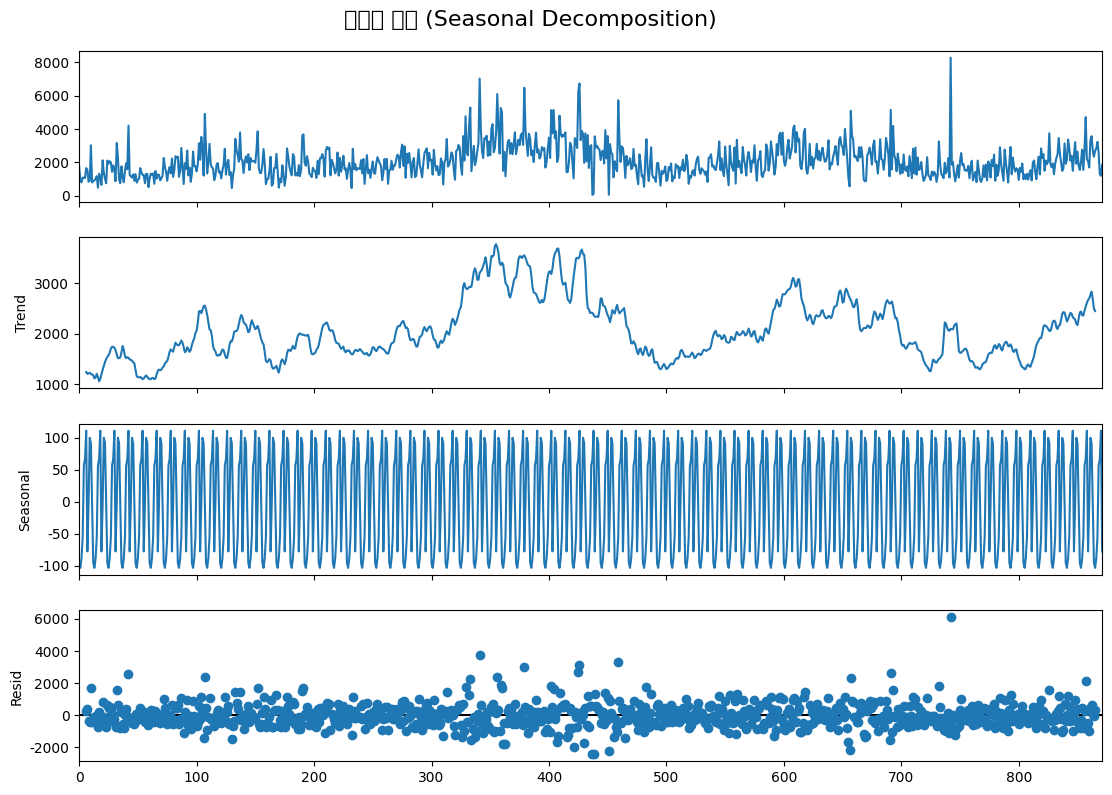

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54632 (\N{HANGUL SYLLABLE HAM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/


 방법 2: 자기상관 함수 (ACF) 플롯


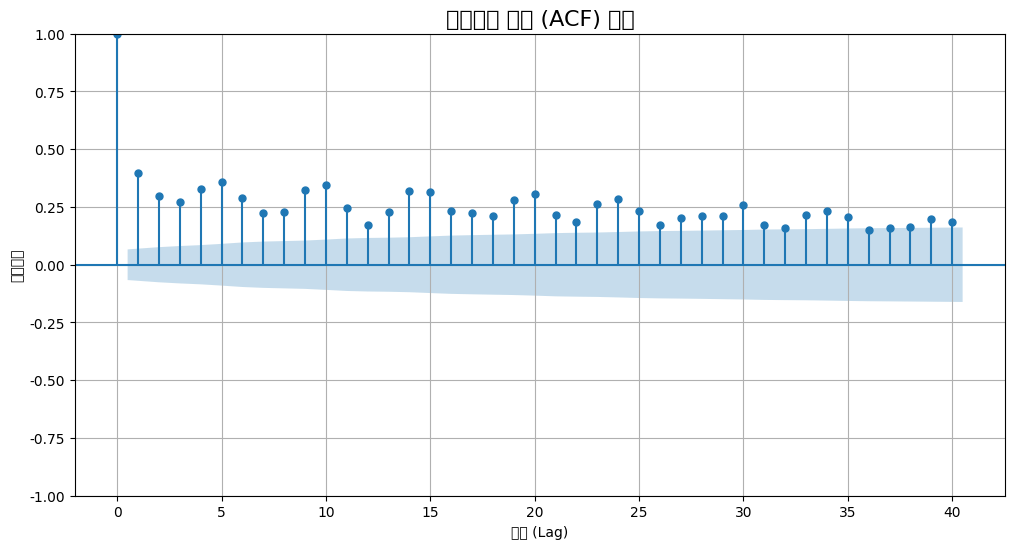

In [31]:
# 한글 폰트 설정
# Set the font to NanumGothic
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False) # Allow negative signs to be displayed correctly

daily_sales.drop('판매일', axis=1, inplace=True)

def check_seasonality(series, period=7):
    """
    시계열 데이터의 계절성을 판별하기 위한 시각화 함수

    Parameters:
    -----------
    series : Series
        분석할 시계열 데이터 (datetime 인덱스)
    period : int
        계절성 주기 (월별 데이터의 연간 주기는 12)
    """

    # --- 방법 1: 계절적 분해 (Seasonal Decomposition) ---
    print("\n" + "="*50)
    print(" 방법 1: 계절적 분해 결과")
    print("="*50)

    # seasonal_decompose 함수를 사용해 시계열 분해
    decomposition = seasonal_decompose(series, model='additive', period=period)

    # 분해 결과 시각화
    fig = decomposition.plot()
    fig.set_size_inches(12, 8)
    plt.suptitle('시계열 분해 (Seasonal Decomposition)', y=1.02, fontsize=16)
    plt.show()

    # --- 방법 2: 자기상관 함수 (ACF) 플롯 ---
    print("\n" + "="*50)
    print(" 방법 2: 자기상관 함수 (ACF) 플롯")
    print("="*50)

    fig, ax = plt.subplots(figsize=(12, 6))
    # plot_acf 함수로 ACF 플롯 그리기
    plot_acf(series, lags=40, ax=ax)
    plt.title('자기상관 함수 (ACF) 플롯', fontsize=16)
    plt.xlabel('시차 (Lag)')
    plt.ylabel('자기상관')
    plt.grid(True)
    plt.show()

# 함수 실행 (월별 데이터이므로 period=12)
check_seasonality(daily_sales, period=12)

In [6]:
df.columns

Index(['Unnamed: 0', '판매일', '판매수량', 'is_holiday', 'holiday_name',
       'is_long_holiday', 'days_to_holiday', 'days_from_holiday',
       'is_day_before_holiday', 'is_day_after_holiday', 'is_lunar_new_year',
       'is_chuseok', 'is_childrens_day', 'is_memorial_day',
       'is_summer_vacation', 'is_year_end_season', '7_outlier', '요일',
       '평균기온(℃)', '최저기온(℃)', '최고기온(℃)', '국제유가', '소비자물가지수', '소비자심리지수', '월',
       'month_sin', 'month_cos', 'day_of_week', 'day_of_year', 'week_of_year',
       'day_of_month', 'quarter', 'is_weekend', 'is_month_start',
       'is_month_end', '년도', 'weekend_count_in_month', 'day_sin', 'day_cos',
       'dow_sin', 'dow_cos', 'sales_lag_1d', 'sales_lag_7d', 'sales_lag_14d',
       'sales_lag_30d', 'sales_lag_60d', 'sales_lag_90d', 'sales_lag_365d',
       'sales_lag_7d_same_dow', 'sales_lag_12m', 'sales_rolling_mean_7d',
       'sales_rolling_std_7d', 'sales_rolling_max_7d', 'sales_rolling_min_7d',
       'sales_rolling_mean_14d', 'sales_rolling_std_14d',

In [10]:
# '판매일' 컬럼을 datetime 형식으로 변환 (이미 되어 있지만, 안전하게 다시 실행)
df['판매일'] = pd.to_datetime(df['판매일'])

# 데이터의 최소 날짜 찾기
min_date = df['판매일'].min()

# 각 날짜에 대해 최소 날짜로부터 몇 개월이 지났는지 계산
# 월별 순번 계산 (0부터 시작)
df['월별_순번'] = (df['판매일'].dt.year - min_date.year) * 12 + (df['판매일'].dt.month - min_date.month)

# 1부터 시작하도록 1을 더해줌
df['월별_순번'] = df['월별_순번'] + 1

# 결과 확인
print(df[['판매일', '월별_순번']].head())
print(df[['판매일', '월별_순번']].tail())

         판매일  월별_순번
0 2021-01-04      1
1 2021-01-04      1
2 2021-01-04      1
3 2021-01-04      1
4 2021-01-04      1
              판매일  월별_순번
221696 2024-06-27     42
221697 2024-06-27     42
221698 2024-06-27     42
221699 2024-06-27     42
221700 2024-06-27     42


In [21]:
# '월별_순번'으로 그룹화하고 '판매수량' 집계
monthly_sales = df.groupby('월별_순번')['판매수량'].sum().reset_index()

# 월별 순번으로 정렬 (이미 그룹화 시 정렬되지만 명시적으로)
monthly_sales = monthly_sales.sort_values('월별_순번')

# 결과 확인
print(monthly_sales.head())
print(monthly_sales.tail())

   월별_순번   판매수량
0      1  22760
1      2  28932
2      3  30019
3      4  30679
4      5  38452
    월별_순번   판매수량
37     38  32826
38     39  30005
39     40  42098
40     41  45900
41     42  45231


In [22]:
monthly_sales.drop('월별_순번', axis=1, inplace=True)
monthly_sales.head()

,판매수량
0,22760
1,28932
2,30019
3,30679
4,38452



 방법 1: 계절적 분해 결과


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


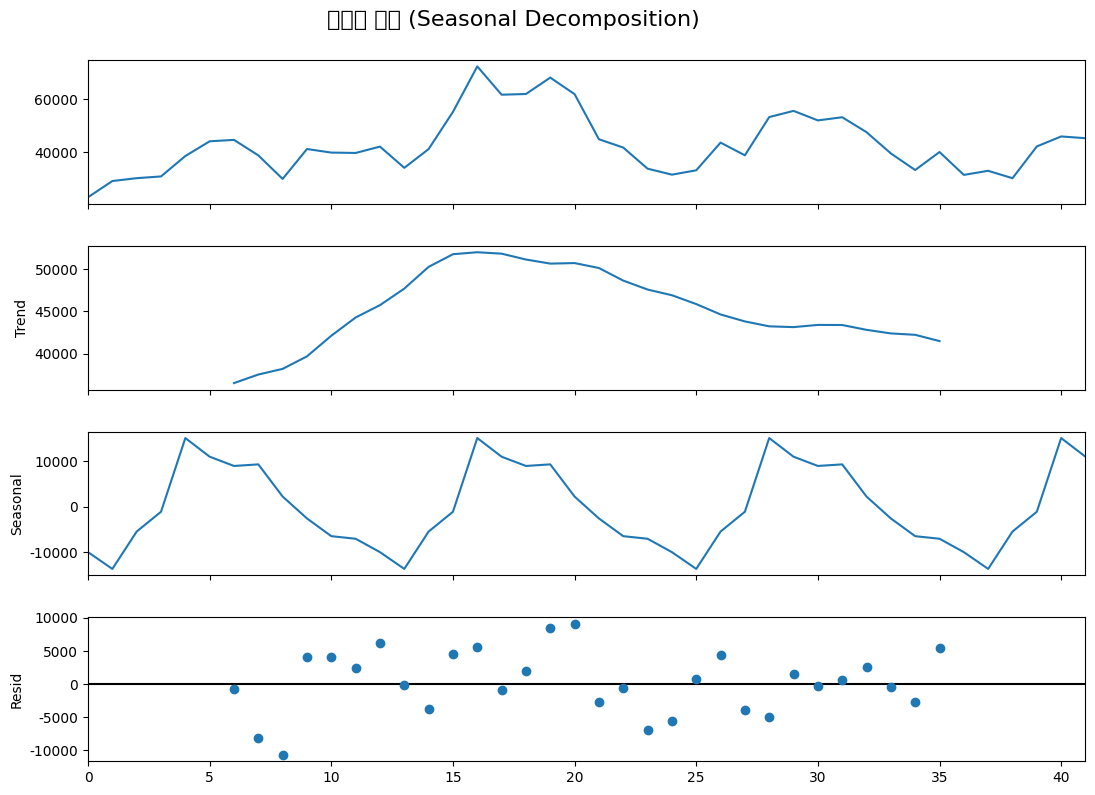

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54632 (\N{HANGUL SYLLABLE HAM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/


 방법 2: 자기상관 함수 (ACF) 플롯


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


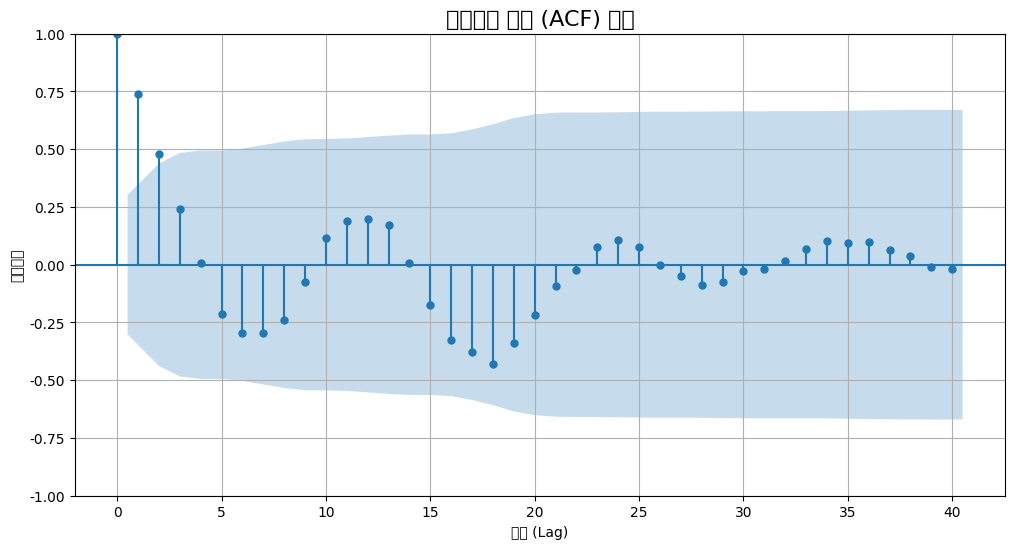

In [23]:
# 함수 실행 (월별 데이터이므로 period=12)
time_series = monthly_sales
check_seasonality(time_series, period=12)